In [3]:
# Click into this cell and press shift-enter before using this notebook.
# This line loads the ability to use %%ai in your file
%load_ext jupyter_ai_magics
# These lines import the Python modules we commonly use in CMPSC 5A
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots

# Lecture 6, CMPSC 5A, F25

10/14/2025, Tuesday of Week 3

# Notes to self 
* Check font size
* Check that you are sharing the screen on the zoom session
* Ask staff to help monitor the zoom chat
* Remind students to run the top cell

## Today's Jupyter Notebook is more than 1 lecture's worth

Today's Jupyter Notebook is probably two lectures' worth of material.

We'll keep track of where we get to, and we'll start from that place next lecture.

## Where are we in the reading?

You should have already read:
* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 2 (Causality and Experiments)](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)

The new reading for today was:

* [Chapter 5 (Sequences)](https://inferentialthinking.com/chapters/05/Sequences.html)
  
For Tuesday of week 4:

* [Chapter 6 (Tables)](https://inferentialthinking.com/chapters/06/Tables.html)

For Thursday of week 4:

* [Chapter 7 (Visualizations)](https://inferentialthinking.com/chapters/07/Visualization.html)

I realize this is a lot.  But we need a lot of basic tools in our toolbox before we can really start *doing* Data Science and not just learning about the individual pieces.

## Last time

Here's a summary of what we covered in lecture05

* We reviewed the difference between backslash: (`\`) and forward slash: (`/`)
  
* We noted that you can use backslash to continue lines in Python if a line of code is getting too long, like this:
  ```
  ucLocationsNew = ucLocations \ 
     .relabeled("Campus","name") \
     .relabeled("Latitude","lat") \
     .relabeled("Longitude","long")
  ```

<p/>
  
* CSV Files are "comma separated values"

* If you use `table.show()` on a large table in a Jupyter Notebook, use `Edit/Clear Cell Output` on that cell before you turn in your notebook.  Or remove the call.   It makes your notebook "bloated" in size which makes it hard to grade.

* We covered these table properties
  * `table.num_columns`
  * `table.num_rows`
  * `table.labels`

<p/>
    
* We covered these table *methods*
  * `table.select("Column1","Column2","Column3")` will make a new table object with just the columns indicated.
  * The method `table.relabeled("old name","new name")` can be used to make a new table with the labels changed.


We reviewed how we can make a table with specific columns and data using the `with_columns` method, and the `make_array` function:

In [ ]:
coursesAndUnits = Table().with_columns(
    "courses",make_array("CMPSC 5A","MATH 8","ARTHI 101"),
    "units", make_array(4, 5, 4))
coursesAndUnits

We noted that the `relabeled` method calls can be *chained* to rename multiple columns:

In [ ]:
coursesAndUnits.relabeled("units","credits").relabeled("courses","classes")


## New material: let's take another look at the `.column()` method

And to do that, we'll need the table from last lecture, which we built from CSV data in a string,
like this:


In [ ]:
# Note that this CSV data came from ChatGPT and is not necessarily accurate.
# It's good enough for a demonstration of Python code, 
# but should not be used for decision making

uc_csv_data = """
Campus,Location,Undergrad Enrollment,Grad Enrollment,Total Enrollment,Year Founded,Latitude,Longitude
UCLA,Los Angeles,31600,13100,44700,1919,34.0689,-118.4439
UC Berkeley,Berkeley,30800,11700,42500,1868,37.8719,-122.2585
UC San Diego,San Diego,30200,9700,39900,1960,32.8801,-117.2340
UC Davis,Davis,30300,7500,37800,1905,38.5382,-121.7617
UC Santa Barbara,Santa Barbara,22000,3600,25600,1944,34.4133,-119.8489
UC Irvine,Irvine,29600,5800,35400,1965,33.6405,-117.8443
UC Santa Cruz,Santa Cruz,17300,1800,19100,1965,36.9914,-122.0588
UC Riverside,Riverside,23900,5400,29300,1954,33.9737,-117.3281
UC Merced,Merced,7700,1100,8800,2005,37.3646,-120.4244
"""

from io import StringIO
ucTable = Table.read_table(StringIO(uc_csv_data))

In [ ]:
ucTable

Here's a table about the column method:

| Code | Explanation |
|-|-|
| `table.column(column_name)` | If `column_name` is a string, return data from the column with that name as an array, not as a table |
| `table.column(column_num)` | If `column_num` is an integer, return data from that column (columns numbered 0, 1, 2 ... etc. |
| `table.column(column_num).item(row_num)` | Return data item from column and row |

We can pull out any of the columns with `.column`.  For example, Undergrad Enrollment:

In [ ]:
ucTable.column("Undergrad Enrollment")

What we get back is a `numpy.ndarray`
* This means we are using the *numeric python* module (`numpy`) to make an *n-dimensional array* (`ndarray`)
* This is what we get when we use the `make_array` function from `datascience` like this:

In [ ]:
numbers = make_array(200, 500, 800)
numbers

In [ ]:
type(numbers)

In [ ]:
ugrads = ucTable.column("Undergrad Enrollment")
ugrads

In [ ]:
type(ugrads)

# What can we do with a numpy.ndarray? (Chapter 5)

Now, let's go back into Chapter 5 for a moment.

What can we do with a numpy array?  Lots of things, as it turns out!

We can find the sum, for example:


In [ ]:
ugrads

In [ ]:
sum(ugrads)

In [ ]:
numbers

In [ ]:
sum(numbers)

Applying that to our ucTable:

In [ ]:
ucTable

We can compute the total number of undergrads, grads, and total enrollment:

In [ ]:
total_ugrads = sum(ucTable.column("Undergrad Enrollment"))
total_ugrads

In [ ]:
total_grads = sum(ucTable.column("Grad Enrollment"))
total_grads

We can also do a sanity check on the Total Enrollment column.  We can try adding the two colums directly and see if it matches the column in the table.  First let's pull out three variables for the separate columns:

In [ ]:
ugradsColumn = ucTable.column("Undergrad Enrollment")
gradsColumn = ucTable.column("Grad Enrollment")
totalColumn = ucTable.column("Total Enrollment")

In [ ]:
ugradsColumn

In [ ]:
gradsColumn

Now, we can form a new `numpy.ndarray` by adding these two together.  

In [ ]:
sumColumn = ugradsColumn + gradsColumn

Let's see what the value and type of that variable is:

In [ ]:
sumColumn

In [ ]:
type(sumColumn)

Now let's compare the totalColumn, which are the values from the table:

In [ ]:
totalColumn

It appears to be the same values!  But just in case, let's subtract; if they are equal, all of the values in the difference array should be zero:

In [ ]:
sumColumn - totalColumn

In this case, since there are only nine values in the array, we can just look at them.  But if there were hundreds, or thousands of values, we might want to ask the computer to check that for us.  

There's a way to do that using a function from the `numpy` package.

And *this will end up being an important technique* later in the class, so even if it seems silly, now, let's take a look:

First, let's give the difference a name:


In [ ]:
difference = sumColumn - totalColumn

In [ ]:
difference

In [ ]:
type(difference)

Now, let's use the `numpy.nonzero()` function.   Since we have `import numpy as np` in the top of our notebook, we use `np` instead of `numpy` to refer to this function:

In [ ]:
np.nonzero(difference)

What we get back is an empty array, `[]`.   This tells us that there are no elements in this array that are non-zero.

If we did have one or more zeros, we'd be given the indexes of those values (some people say "indices" instead of "indexes").  Here's an example:

In [ ]:
firstArray  = make_array(200, 500, 800, 1000, 1250, 5000)
secondArray = make_array(200, 600, 800, 1000, 1350, 5000)
diffs = firstArray - secondArray
diffs

In [ ]:
np.nonzero(diffs)

What the `1` and `4` signify here is that the two arrays differ at index `1` and at index `4`.

When the arrays are small like this, we don't really need this techinque, but when the arrays get
huge (10s, 100s, or 1000s of rows), it will be very handy.  So we'll definitely see this again
before the course is over!

### Review: Compare `.column("Column Name")` vs. `.select("Column Name")`

These both select out a column, but with different results.

We can get a specfic column as an `array` like this:

In [ ]:
ucTable.column("Campus")

Using `.column` gives us the specified column as an `array`, not as a table.  

Compare `.column` vs. `.select`:

In [ ]:
ucTable.select("Campus")

And compare the data types.  Note that the data type is important because it tells you what methods you can and cannot apply to the object:

In [ ]:
type(ucTable.select("Campus"))

In [ ]:
type(ucTable.column("Campus"))

* Using `.select`, we get a `datascience.tables.Table` back and we can use the `Table()` methods on it (from Chapter 6).
* Using `.column`, we get a `numpy.ndarray` back and we can use the `array` methods on it (from Chapter 5).

# Review: `.select(...)`, `.column(...)`, `.take(...)`:

Suppose we have a students table defined like this:

In [5]:
students = Table().with_columns(
    "name",make_array("Chris Gaucho","Laurie Sabado","Pat Chen"),
    "perm",make_array("A123456","B234567","C345678"),
    "email",make_array("cgaucho@ucsb.edu","lsabado@ucsb.edu","pchen@ucsb.edu")
)

In [6]:
students

name,perm,email
Chris Gaucho,A123456,cgaucho@ucsb.edu
Laurie Sabado,B234567,lsabado@ucsb.edu
Pat Chen,C345678,pchen@ucsb.edu


We can select out the names and emails with `.select("name", "email")`

In [8]:
students.select("name", "email")

name,email
Chris Gaucho,cgaucho@ucsb.edu
Laurie Sabado,lsabado@ucsb.edu
Pat Chen,pchen@ucsb.edu


We can make a `numpy.ndarray` of the names with `.column("perm")`

In [11]:
students.column("perm")

array(['A123456', 'B234567', 'C345678'],
      dtype='<U7')

We can get a table with just the middle row by using `.take(1)`

In [12]:
students.take(1)

name,perm,email
Laurie Sabado,B234567,lsabado@ucsb.edu


Or a table without the top row (row 0) by using:

Note that `students.row(1)` gives me something, but it is NOT a table object.

In [18]:
students.row(1)

Row(name='Laurie Sabado', perm='B234567', email='lsabado@ucsb.edu')

So, if you are asked to produce a *Table* with a certain row or set of rows, you need
to use `.take(...)`, not `.row(...)`

We can also specify multiple row indexs in a `.take(...)` method call:

In [20]:
students.take([1,2])

name,perm,email
Laurie Sabado,B234567,lsabado@ucsb.edu
Pat Chen,C345678,pchen@ucsb.edu


# In-Class Activity ic07

Please open `ic07-10.14` on Gradescope and complete it now.

* <https://ucsb.instructure.com/courses/27686/assignments/399434?module_item_id=1877711>

If you have questions, please ask!  Also consult the material above.

If you have trouble with the assignment, **ask during class**, don't wait until later.  This must be completed **during class** (we don't do makeup for in-class assignments.)

## Review: A single cell: `table.column(col).item_num(row)`

If we want a specific cell, we can ask for it by column and row, using either column name or column number, and then row number.

For example:


In [ ]:
ucTable

In [ ]:
ucTable.column("Campus")

In [ ]:
ucTable.column("Campus").item(4)

In [ ]:
ucTable.column("Undergrad Enrollment").item(4)

We went over that last time, but this time we will also point out that the `.column()` method can take either a column name, or a column index (starting from 0), like this:

In [ ]:
ucTable

In [ ]:
ucTable.column(0)

In [ ]:
ucTable.column(1)

In [ ]:
ucTable.column(2)

In [ ]:
ucTable.show(5)

In [ ]:
ucTable.column(2).item(3)

In [ ]:
ucTable.column(4).item(1)

### Review: Adding an age column to a table

Last time, we calculated a table of UC ages by:
* Making a smaller table using `.select`
* Relabeling columns using `relabel` (that also works just like `relabeled`)
* Using numpy math on the year column to make an array of ages
* Using `with_column` to add that new column to the table.

Let's review that process:


In [ ]:
ucYears = ucTable.select("Campus","Year Founded") \
  .relabel("Year Founded","year") \
  .relabel("Campus","name")
ucYears.show(3)

In [ ]:
ucYears.column("year")

In [ ]:
ages = 2025 - ucYears.column("year")
ages

In [ ]:
ucAges = ucYears.with_column("age",ages)
ucAges

Let's do that again, but all in one code cell:

In [ ]:
ucAges = ucYears.with_column("age", 2025 - ucYears.column("year"))

In [ ]:
ucAges

## Section 6.1: Sorting a table

Sorting a table is covered in [Section 6.1](https://inferentialthinking.com/chapters/06/1/Sorting_Rows.html).

The following isn't a complete coverage of [Section 6.1](https://inferentialthinking.com/chapters/06/1/Sorting_Rows.html), so *you still need to read it*.

Now that we have a table that has all of the UCs in it, let's sort them by age:

In [ ]:
ucAges = ucAges.sort("age")

By default, we get smallest to largest (in this case, newest first, oldest last).

If we want the opposite direction, we can specify it this way:

In [ ]:
ucAgesSorted = ucAges.sort("age", descending=True)

In [ ]:
ucAges

## Section 6.2: Selecting Rows from a table (`take`)

Selecting rows from a table is covered in [Section 6.2](https://inferentialthinking.com/chapters/06/2/Selecting_Rows.html)

### Use case: List the five oldest UC Campuses

* As we mentioned last time, "use case" means "when would we need this to do something useful?"
* We are explaining the `take()` method in the context where it would be useful.

If we have a table of UC Campuses with their ages, like this:


In [ ]:
ucAges

We can find the five oldest UCs, by:
* First, sorting oldest to newest
* Then, taking the first five rows

Here's what that looks like:

In [ ]:
ucsSortedByAgeDescending = ucAges.sort("age",descending=True)
ucsSortedByAgeDescending

In [ ]:
np.arange(5)

In [ ]:
ucsSortedByAgeDescending.take(3)

In [ ]:
ucsSortedByAgeDescending.take([0,1,2,3,4])

In [ ]:
ucAges.sort("age",descending=True).take(np.arange(5))

Let's unpack that from the inside out, starting with `np.arange(5)`

* It's important to know that `np` is an abbreviation for `numpy` in case we want to look up the documentation for `arange` or ask an AI about it.
* Thus: `np.arange(5)` refers to the `arange` function from the `numpy` module.
* What it does is described in [Section 5.2 (Ranges)](https://inferentialthinking.com/chapters/05/2/Ranges.html), which you have hopefully already read, but lets review it now.

So `np.arange(5)` gives us a numpy.ndarray (an n-dimensional array, but in this case a 1-dimensional array), with the numbers `0, 1, 2, 3, and 4`:

In [ ]:
np.arange(5)

In [ ]:
type(np.arange(5))

In [ ]:
len(np.arange(5))

As you might guess, `np.arange(7)` starts at zero and ends at six:

In [ ]:
np.arange(7)

So, now we can see that

* The code `ucAges.sort("age",descending=True).take(np.arange(5))`
* is the same as: `ucAges.sort("age",descending=True).take([0,1,2,3,4])`

In [ ]:
ucAges.sort("age",descending=True).take([0,1,2,3,4])

Which means: sort in descending order by age, and take the first five things (i.e. the five oldest).

What if we wanted the three newest?

In [ ]:
ucAges.sort("age",descending=False).take([0,1,2])

In [ ]:
ucAges.sort("age",descending=False).take(np.arange(3))

### HOWEVER!  Theres's a trap here!

Look at the data for the ages of the UC Campuses. What is the trap that I could fall into when selecting the "n oldest" or "n newest" UCs using *this technique*?  There's a case where I might get the *wrong answer*.

Think about that and discuss it with your neighbor for a moment; then I'll see if anyone has thoughts...

In [ ]:
ucAges.sort("age")

<details>
  <summary>Here's the situation I had in mind</summary>  
  The trap occurs if I ask for the two newest UCs, or the seven oldest UCs using this method.
  Can you figure out why?
</details>


<details>
  <summary>Here's an example of it getting a wrong (or at least incomplete/misleading) answer </summary>  

This approach to getting the two oldest or two newest UCs would use code like this:

```python
twoNewest = ucAges.sort("age").take(np.arange(2)) # naive approach to "two newest UCs"
sevenOldest = ucAges.sort("age", descending=True).take(np.arange(7)) # naive approach to "seven oldest UCs"
```

But *there's a tie* between UC Santa Cruz and UC Irvine, which were founded in the same year.  

Strictly speaking, we could break the tie by seeing if they were founded on different days of the year.

(In fact, search results show that UC Santa Cruz was founded in June 1965, with the day unclear, and UC Irvine on October 4, 1965, so technically, UC Santa Cruz is older.)

*BUT* for purposes of this example, let's pretend they were founded on the same day in 1965, and are exactly the same age.

</details>


The next few cells and their output are *collapsed* so as not to give away the answer too soon in lecture.  You can *expand* a collapsed cell in a notebook on JupyterHub by using the commands on the `View` menu (`Collapse...` and `Expand...`) or by clicking the three dots on a collapsed cell (e.g. ••• )

In [ ]:
ucAges.sort("age").take(np.arange(2)) # naive approach to "two newest UCs"

In [ ]:
ucAges.sort("age", descending=True).take(np.arange(7)) # naive approach to "seven oldest UCs"

### A better approach

If we want to find the seven oldest UCs *but also account for ties* (meaning we could get actually get more than two), we need a slightly more sophisticated approach. 

<details>
    <summary>Here's what we'll do:</summary>

* We start the same way, by sorting the table by age
* Then, if we want the seven oldest UCs (but allowing for ties), we find the age of the single UC that's in position 6 in that list (recall that we use 6, not 7, because the numbers start at 0).
* Then we find all UCs that have an age that is greater than or equal to that number.

Here's what that looks like:
    
</details>

In [ ]:
ageOf7thOldestUC = ucAges.sort("age", descending=True).column("age").item(6)
ageOf7thOldestUC

In [ ]:
oldestUCs = ucAges.where("age",are.above_or_equal_to(ageOf7thOldestUC))
oldestUCs

Note that this is the right answer, but the data aren't sorted!   That's because the sort command returns a new table; it doesn't sort the existing one!  

So after the first command, the ucAges table is still in the origial order.  If we want it to be sorted, we have to sort it again, like this:

In [ ]:
oldestUCs = ucAges.where("age",are.above_or_equal_to(ageOf7thOldestUC)).sort("age", descending="True")
oldestUCs

### The UCSB Courses Dataset




| Data folder in same folder as notebook | Explanation |
|-|-|
|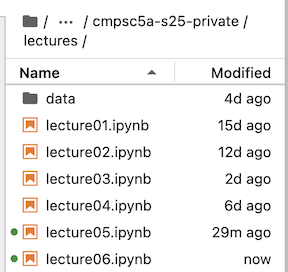 | As you may recall, any time we have a CSV (comma separated value) file in the `data` folder that's in the same folder as our notebook, as in the  example, we can open it with code this: |

In [ ]:
courseTable = Table.read_table("data/ucsb-s25-courses.csv")

In [ ]:
courseTable

One thing about this table is that the `COURSEID` column has string data in it that smushes three things together: 

* Subject Area (e.g. "CMPSC", "MATH", "PSTAT", "ECE", "ARTHI")
* Course Number (e.g. "5B", "120A", etc.)
* Section Suffix (e.g. "-1", "-2")

What we might prefer is a table that has separate columns for each of these.

We can use two techniques in combination to do this:
* Defining "plain old Python functions" (this part isn't specific to Data Science; it's just Python programming like you would learn in any good Python course)
* Using the `apply` method of the `datascience` library; this allows us to create a new `numpy.ndarray` from a column, which we can then attach to a table using `with_columns`.

Let's show how to do that now:

### A digression: randomly sampling a table

The table we are looking at is *big*:

In [ ]:
courseTable.num_rows

That's a lot of rows; and it appears to be sorted in such a way that the first few rows are all Computer Science courses. 

If we sort it by `COURSEID`, we get `ANTH` courses at the top:

In [ ]:
courseTable.sort("COURSEID")

### What if we want a random sample?

How big is this table again?

In [ ]:
courseTable.num_rows

That's big.  If we are trying to get an overall view of the data, we might want to look at, say, 10 randomly chosen rows from this table.  

How can we do that? 

First, we can use a `numpy` function to generate random row indexes between 0 and n-1.   Let's assign `n=courseTable.num_rows`

In [ ]:
n=courseTable.num_rows

Then let's generate an array of all of the numbers from 0 to n-1, using the `np.arange()` function:

In [ ]:
allRowIndexes = np.arange(n)

In [ ]:
allRowIndexes

Now we can use `np.random.choice()` to select 10 random indexes from that array of numbers.

* The first argument, allRowIndexes, is the array we choose from
* The second is how many things we choose
* The `replace=False` says: once you choose an element of this array, don't' choose it again (i.e. don't put it back in the array you are choosing randomly from, don't "replace" it).

In [ ]:
randomIndexes = np.random.choice(allRowIndexes, 10, replace=False)

In [ ]:
randomIndexes

Note that if we run the cell with `np.random.choice` in it multiple time, we get different answers each time!  

(Side note: there's a way to force the same answer each time if we *want or need* that, called "seeding" the random number generator.  We'll discuss that another time.)

Now that we have randomIndexes, we can use this with the `take` method of the  `Table` from `datascience` like this:

In [ ]:
tenRandomRows = courseTable.take(randomIndexes)

In [ ]:
tenRandomRows

I split this up so that we could look at each of the parts separately. Here it is all together.  This time, we'll just take 4 rows (to keep the notebook more compact)

In [ ]:
# Try re-running this; you'll get different rows each time
n = courseTable.num_rows # get number of rows
allRowIndexes = np.arange(n) # get all of the row indexes, 0 .. n-1
fourRandomIndexes = np.random.choice(allRowIndexes, 4, replace=False)
fourRandomRows = courseTable.take(fourRandomIndexes)
fourRandomRows

We could also do this on a single line, though it's a bit harder to read and understand:

In [ ]:
courseTable.take(np.random.choice(np.arange(courseTable.num_rows), 4, replace=False))

It's a little bit easier to read if we break it up over multiple lines.
* Note that here we don't need line continuations (the backslash `\` at the end of the line).
* Python allows us to continue on a new line if we are inside a set of unclosed parentheses.
* The way that I've formatted this is typical of how experienced programmers format a complex set of nested function calls
* The indentation is used to help you match open and closing parentheses `(` and `)`

In [ ]:
courseTable.take( 
    np.random.choice( 
        np.arange(courseTable.num_rows), 
        4, 
        replace=False 
    ) 
)   

But that's still a lot, and this seems like a generally useful thing to do.  I wonder if we can come up with a shortcut.

### Defining our own functions

Any time there's something we might want to do over and over again that we can spell out in clear steps, that's a good time to think of writing our own function.

Here's the code again, split into multiple lines with comments:

In [ ]:
# Try re-running this; you'll get different rows each time
n = courseTable.num_rows # get number of rows
allRowIndexes = np.arange(n) # get all of the row indexes, 0 .. n-1
fourRandomIndexes = np.random.choice(allRowIndexes, 4, replace=False)
fourRandomRows = courseTable.take(fourRandomIndexes)
fourRandomRows

To convert this into a function definition, we can first "generalize" the names.  This means making them a bit more "generic".  Compare the code on the left with the code on the right:
* We've pulled out the number `4` and defined it as a variable
* We've changed the name of the table from `courseTable` to `myTable`

<table>
    <thead>
        <tr>
            <th>Before</th>
            <th>After</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <pre>
                    
n = courseTable.num_rows 
allRowIndexes = np.arange(n) 
fourRandomIndexes = \
  np.random.choice(
    allRowIndexes, 4, replace=False
  )
fourRandomRows = courseTable.take(fourRandomIndexes)
fourRandomRows
                </pre>
            </td>
            <td>
                <pre>
size = 4
n = myTable.num_rows 
allRowIndexes = np.arange(n) 
randomIndexes = \
  np.random.choice(
    allRowIndexes, size, replace=False
  )
randomRows = myTable.take(randomIndexes)
randomRows
                </pre>
            </td>
        </tr>
    </tbody>
</table>

Now, we are ready to turn this into a function definition:
* The things that can change each time (the table, the sample size) become *arguments*
* We put the keyword `return` in front of the final results we want to get back

In [ ]:
def randomSample(myTable, size):
    n = myTable.num_rows 
    allRowIndexes = np.arange(n) 
    randomIndexes = \
      np.random.choice(
        allRowIndexes, size, replace=False
      )
    randomRows = myTable.take(randomIndexes)
    return randomRows

Now we can call this function on any table we like.  Here's another table that's in our data directory:

In [ ]:
movies = Table.read_table("data/movies_by_year_with_ticket_price.csv")

In [ ]:
randomSample(movies,2)

In [ ]:
randomSample(courseTable,3)

In [ ]:
randomSample(courseTable,5)

## Now, let's look at this `COURSEID` field again

Now that we have a convenient way to get a random sample of a table, let's look some more at the COURSEID values.

* We'll pull out a random sample of the table
* Then, we'll focus on the data from the first column
* Then, we'll look at the specific values

Recall the difference between `select` and `column`:



In [ ]:
fourRows = randomSample(courseTable,4)
fourRows.select("COURSEID")

In [ ]:
fourRows.column("COURSEID")

The difference:
* `.select` gives us a Table (specifically, a `datascience.tables.Table`)
* `.column` gives us an Array (specifically, a `numpy.ndarray`)

In [ ]:
type(fourRows.select("COURSEID"))

In [ ]:
fourRows.column("COURSEID")

These values have a particular format, i.e. they are spaced in a particular way, but it might be hard to see from the output above.  When we show a `Table`, the spacing inside of `'COMM    160OD-1'` isn't preserved; the multiple spaces become one space.  

On the other hand, it's hard to see in the output from `fourRows.column("COURSEID")` how things line up.

This is where a python `for` loop together with a print statement may be of some help.

## For loops with arrays

Whenever you have an array, we can do something repeatedly to each item in that array with a `for` loop in Python. 

This is our first look at `for` loops:
* We'll dive into them in detail when we get to Section 9.2 of the book
* This is just a quick preview, but if you want to know more you can look ahead at [Section 9.2 (Iteration)](https://inferentialthinking.com/chapters/09/2/Iteration.html)

First, let's assign the array of COURSEID values to a variable name:


In [ ]:
courseIds = fourRows.column("COURSEID")
courseIds

Now we apply a for loop:

In [ ]:
for courseId in courseIds:
    print(courseId)

Note that we get one courseId on each line.  It's still a little hard to see the spacing though.  Suppose we replace all of the spaces with an `@` sign; it might be easier to count:

In [ ]:
for courseId in courseIds:
    print(courseId.replace(" ","@"))

Ok! Now we are getting somewhere.  Lets also print some numbers on top so that we can see where the columns line up:


In [ ]:
print("          11111111112")
print("012345678901234567890")
for courseId in courseIds:
    print(courseId.replace(" ","@"))

Those first two lines may look a little strange, but what you can see from them is where the columns are in the string data:
* So the subject area is in columns zero through seven, or in Python notation: `[0:8]` (we stop *before* the second number).
* The three-digit course number starts in column `8` and is columns 8,9,10 (or in Python slice syntax, columns `[8:11]`.
* That is followed by an option two character code, so the full course number is `[8:13]`
* The suffix for the section starts in position 14 and goes to the end: `[14:]`

### Functions to break apart `COURSEID`

With that, we can write some functions that will turn a COURSEID into its three parts:

In [ ]:
def courseIdToDept(courseId):
    return courseId[0:8]

def courseIdToCourseNum(courseId):
    return courseId[8:13]

def courseIdToSuffix(courseId):
    return courseId[14:]

We can test these with our for loop.  

Note that code that is "inside the loop" is indented:

In [ ]:
print("Departments:")
for courseId in courseIds:
   print(courseIdToDept(courseId))

# The \n makes a new line before the string
print("\nCourseNums:")
for courseId in courseIds:
   print(courseIdToCourseNum(courseId))

print("\nSuffixes:")
for courseId in courseIds:
   print(courseIdToSuffix(courseId))


We can run that again, but on a random sample, and rerun it a few times to see if it seems to be working:

In [ ]:
courseIds = randomSample(courseTable,5).column("COURSEID")

print("Departments:")
for courseId in courseIds:
   print(courseIdToDept(courseId))

print("\nCourseNums:")
for courseId in courseIds:
   print(courseIdToCourseNum(courseId))

print("\nSuffixes:")
for courseId in courseIds:
   print(courseIdToSuffix(courseId))


Here's another way to format the output that make it a bit easier to see what's going on.  This uses a "format string" in Python.  
* We put the letter `f` before the opening `"` in the string
* Then we can put variables names in `{}` and they will be substituted in
* Also notice that we can put multiple lines of code inside our loop:

In [ ]:
courseIds = randomSample(courseTable,5).column("COURSEID")

for courseId in courseIds:
   dept = courseIdToDept(courseId)
   courseNum = courseIdToCourseNum(courseId)
   suffix = courseIdToSuffix(courseId)
   print(f"courseId={courseId} dept={dept} courseNum={courseNum} suffix={suffix}")


Notice how the columns numbers don't necessarily line up nicely all of the time. 

That's because the lengths of the values can be different from line to line.

If we specify a colon (`:`) and a number after each of the variables in the Python 
format string, we can make them line up nicely.  Consider this output
instead.  The difference is in the `format` line, and it's the numbers
`:14`, `:8`, `:5` and `:3` after each of the variables in the curly braces: `{}` 

In [ ]:
courseIds = randomSample(courseTable,5).column("COURSEID")

for courseId in courseIds:
   dept = courseIdToDept(courseId)
   courseNum = courseIdToCourseNum(courseId)
   suffix = courseIdToSuffix(courseId)
   print(f"courseId={courseId:14} dept={dept:8} courseNum={courseNum:5} suffix={suffix:3}")


## Using functions to make a new table: `apply`

Note: material in this section of the lecture comes from

* [Chapter 8 (Functions and Tables: Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Section 8.1 (Applying a Function to a Column)](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)


Now that we know how to use functions to transform data, 
we can use this to:
* make new arrays using the `apply` method.
* add those to a table as columns

Here's what that looks like:

We start with our courseTable:

In [ ]:
courseTable

Remember the three functions from before for converting `COURSEID` values:

In [ ]:
def courseIdToDept(courseId):
    return courseId[0:8]

def courseIdToCourseNum(courseId):
    return courseId[8:13]

def courseIdToSuffix(courseId):
    return courseId[14:]

We can make three new arrays by applying these functions to column 0 of our `courseTable`.  Each result we get back is an array.  The `0` indicates we are applying our functions to column 0.

In [ ]:
departments = courseTable.apply(courseIdToDept, 0)
departments

In [ ]:
courseNums = courseTable.apply(courseIdToCourseNum, 0)
courseNums

In [ ]:
suffixes = courseTable.apply(courseIdToSuffix, 0)
suffixes

Now, we can create a new table by adding these columns to our existing table:

In [ ]:
newTable = courseTable.with_columns("dept",departments,"courseNum",courseNums,"suffix",suffixes)

In [ ]:
newTable

And with this new tables, we can use the `where` clause to focus our attention on particular departments:

In [ ]:
csCourses = newTable.where("dept",are.equal_to("CMPSC"))

In [ ]:
csCourses

Wait, that's not what we expected?   What's the issue?

It's the spaces.  Consider this:

In [ ]:
newTable.where("dept",are.equal_to("CMPSC   "))

Well that's inconvenient.  What could we do to fix this?

Here's one approach; a modification to our functions that pulls out the department code, etc.  We'll use the python `strip` function to get rid of the extra space characters:

In [ ]:
def courseIdToDept(courseId):
    return courseId[0:8].strip()

def courseIdToCourseNum(courseId):
    return courseId[8:13].strip()

def courseIdToSuffix(courseId):
    return courseId[14:].strip()

With these new definitions in place, let's redo the assignment to the newTable:

In [ ]:
newImprovedTable = courseTable.with_columns(
    "dept", courseTable.apply(courseIdToDept, 0),
    "courseNum", courseTable.apply(courseIdToCourseNum, 0),
    "suffix", courseTable.apply(courseIdToSuffix, 0)
)


And then let's select out the CMPSC courses, this time without having to pad out the department:

In [ ]:
csCourses = newImprovedTable.where("dept",are.equal_to("CMPSC"))

In [ ]:
csCourses

In [ ]:
pstatCourses = newImprovedTable.where("dept",are.equal_to("PSTAT"))
artHistory = newImprovedTable.where("dept",are.equal_to("ARTHI"))

In [ ]:
artHistory

## Bar Graphs

Let's now return to some material from:

* [Chapter 7 (Visualization)](https://inferentialthinking.com/chapters/07/Visualization.html)

Let's see if we can make a bar graph of the data from `courseTable`.

But let's work with the `newImprovedTable` that has `dept`, `courseNum`, `suffix`.  And let's cut the data down to just three departments: `CMPSC`, `MATH`, `PSTAT`, just to make it a bit easier to work with.

It will be really handy to refer to this documentation:
* <https://www.data8.org/datascience/reference-nb/datascience-reference.html#Table.where-Predicates>

In this context, a `predicate` is something that's true or false about rows of our data.  The one we will use here is `are.contained_in` which works with an array.

In [ ]:
desired_departments = make_array("CMPSC", "PSTAT", "MATH")

In [ ]:
courses = newImprovedTable.where("dept", are.contained_in(desired_departments))

In [ ]:
courses.num_rows

Still pretty big, but a lot smaller than what we had before.

The first step is to group our data.

## Grouping Data

In [ ]:
groupByDept = courses.group("dept")

In [ ]:
groupByDept

What we get back is a new table that shows the count of how many rows were in the original data set with each of the distinct values in the original.

Note that the original data has separate rows for lecture and sections.  What if we exclude the sections?  Lectures have section numbers that end in 00; that is the remainder when you divide by 100 is 0.  We can use this to define a function that will tell us whether a section number is for a lecture or not.

In [ ]:
def isLecture(sectionNum):
    # if section number is divisible by 100, it's a lecture
    return sectionNum % 100 == 0

In [ ]:
isLecture(100)

In [ ]:
isLecture(101)

Now we can apply that and add the column to our table:

In [ ]:
courses = courses.with_columns("lecture",courses.apply(isLecture,"SECTION"))

In [ ]:
courses

In [ ]:
lectures = courses.where("lecture",are.equal_to(True))

In [ ]:
lectures.num_rows

In [ ]:
lectures.group("dept")

That's probably a bit more like what we want.  What if we wanted to know the total enrollment?  Can we sum up the `ENROLLED` field for each group?  Yes we can!

In [ ]:
lectures.group("dept", sum)

What we get back is the 'sum' function applied to each column of data.
* The numbers in `ENROLLED sum` show the total of the enrollment
* The numbers in `MAXRENROLL sum` show the total of the max enrollment, i.e. how big the class could be if full
* The numbers if `QUARTER sum` and `SECTION sum` are not really meaningful; they are adding up numbers that are really just identifiers.  We might have done well to exclude those columns before doing our grouping.
* Lecture sum shows us the number of rows for which that field is True.  Since that's every row of data, this actually shows us the same as the counts from the original `.group()` call.

We can now make some bar graphs with this data.

Here's a bar graph of the number of courses offered by each department:


In [ ]:
counts = lectures.group("dept")
counts

In [ ]:
counts.barh("dept") # Bar graph of count, by department

Or we can make a bar graph by enrollment:

In [ ]:
lectures.select("dept","ENROLLED").group("dept",sum)

In [ ]:
lectures.select("dept","ENROLLED").group("dept",sum).barh("dept")

If we want, we can sort first:

In [ ]:
lectures.select("dept","ENROLLED").group("dept",sum).sort("ENROLLED sum").barh("dept")